In [62]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [63]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [64]:
data = process_data(data)
data.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches,label
0,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.730000,3.400000,4.200000,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,0
1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.830000,3.300000,3.800000,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,0
2,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,2.496387,3.660613,4.403196,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,-1
3,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.000000,3.250000,3.300000,65,0,-1,60,0,1,60,0,40,0,50,0,1,70,1,60,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2,0
4,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.000000,3.250000,3.300000,65,0,-1,60,0,1,60,0,40,0,50,0,1,70,1,60,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2,-1


In [65]:
x_train, y_train, x_test, y_test, train_bet, test_bet = split_data(data)
x_train.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.004823,-0.041055,-0.035466,-0.006110,-0.033824,-0.029084,-0.008539,-0.043407,-0.048362,-0.011156,-0.040437,-0.030282,-0.010903,-0.035443,-0.029913,-0.007944,-0.040923,-0.040776,-0.007996,-0.036977,-0.028124,-0.007295,-0.059067,-0.041202,-0.007196,-0.039841,-0.042807,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.008829,-0.085927,-0.013431,-0.003077,-0.067722,-0.014054,-0.008539,-0.128063,-0.014890,-0.005146,-0.062028,-0.017857,-0.007700,-0.072990,-0.015891,-0.007944,-0.082835,-0.021979,-0.004564,-0.052563,-0.012954,-0.004789,-0.123583,-0.018392,-0.005943,-0.100186,-0.012394,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,-0.014839,-0.034645,-0.029456,-0.007627,-0.014050,-0.026078,-0.019082,-0.032825,-0.035810,-0.013159,-0.017710,-0.023869,-0.010903,-0.029185,-0.025907,-0.017964,-0.033570,-0.040776,-0.010283,-0.016468,-0.025090,0.000079,-0.000178,-0.000134,0.000096,-0.000133,-0.000131,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.015209,-0.034645,-0.045482,0.009055,-0.014050,-0.042110,0.007275,-0.043407,-0.065099,0.014085,-0.012028,-0.041905,0.017120,-0.029185,-0.041933,0.000282,-0.000048,-0.000188,0.009734,-0.008265,-0.038743,0.000079,-0.000178,-0.000134,0.000096,-0.000133,-0.000131,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,0.195498,0.042278,-0.065514,0.168291,0.059397,-0.061549,0.265578,0.168233,-0.119492,0.239245,0.035

In [66]:
y_train.head()

10872    1
11599    1
9601     1
10085    1
10550    1
Name: label, dtype: int64

In [67]:
np.unique(y_train.values).shape

(3,)

In [68]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

83

## First neural model start here

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 50)                4200      
_________________________________________________________________
dense_54 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 33        
Total params: 5,768
Trainable params: 5,768
Non-trainable params: 0
_________________________________________________________________


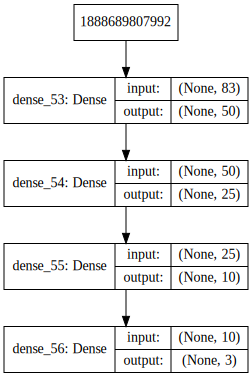

In [83]:
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Input, Activation, Flatten, Dense, Concatenate, Dropout
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd
from keras.callbacks import EarlyStopping

def build_keras_model():
    model = Sequential()
    model.add(Dense(units=50, input_dim=columns, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(units=25, input_dim=columns, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(units=10, input_dim=columns, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(units=3, kernel_initializer='normal', activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy']) # categorical_crossentropy
    return model

model = build_keras_model()

model.summary()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [84]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=100, validation_split=0.04)

Train on 19705 samples, validate on 822 samples
Epoch 1/100
19705/19705 [==============================] - 3s 146us/step - loss: 0.2256 - acc: 0.4554 - val_loss: 0.2239 - val_acc: 0.4282
Epoch 2/100
19705/19705 [==============================] - 1s 66us/step - loss: 0.2148 - acc: 0.4608 - val_loss: 0.2140 - val_acc: 0.4331
Epoch 3/100
19705/19705 [==============================] - 1s 67us/step - loss: 0.2082 - acc: 0.5002 - val_loss: 0.2089 - val_acc: 0.4878
Epoch 4/100
19705/19705 [==============================] - 1s 68us/step - loss: 0.2048 - acc: 0.5202 - val_loss: 0.2054 - val_acc: 0.4988
Epoch 5/100
19705/19705 [==============================] - 1s 67us/step - loss: 0.2023 - acc: 0.5235 - val_loss: 0.2040 - val_acc: 0.4988
Epoch 6/100
19705/19705 [==============================] - 1s 68us/step - loss: 0.2009 - acc: 0.5264 - val_loss: 0.2028 - val_acc: 0.5036
Epoch 7/100
19705/19705 [==============================] - 1s 71us/step - loss: 0.2000 - acc: 0.5277 - val_loss: 0.2020 - v

19705/19705 [==============================] - 1s 66us/step - loss: 0.1934 - acc: 0.5407 - val_loss: 0.1960 - val_acc: 0.5207
Epoch 60/100
19705/19705 [==============================] - 1s 66us/step - loss: 0.1934 - acc: 0.5391 - val_loss: 0.1963 - val_acc: 0.5170
Epoch 61/100
19705/19705 [==============================] - 1s 68us/step - loss: 0.1933 - acc: 0.5403 - val_loss: 0.1973 - val_acc: 0.5134
Epoch 62/100
19705/19705 [==============================] - 1s 68us/step - loss: 0.1933 - acc: 0.5415 - val_loss: 0.1971 - val_acc: 0.5134
Epoch 63/100
19705/19705 [==============================] - 1s 69us/step - loss: 0.1932 - acc: 0.5413 - val_loss: 0.1969 - val_acc: 0.5134
Epoch 64/100
19705/19705 [==============================] - 1s 69us/step - loss: 0.1932 - acc: 0.5409 - val_loss: 0.1966 - val_acc: 0.5158
Epoch 65/100
19705/19705 [==============================] - 1s 74us/step - loss: 0.1931 - acc: 0.5407 - val_loss: 0.1979 - val_acc: 0.5097
Epoch 66/100
19705/19705 [==============

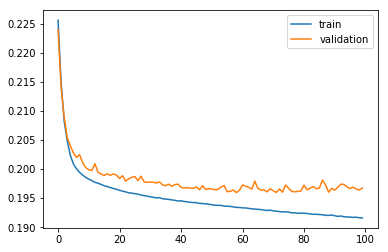

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

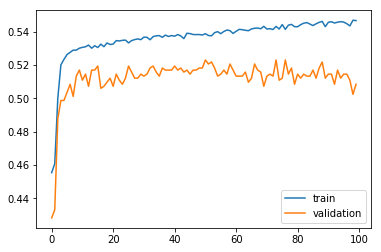

In [86]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 9420
Draw count: 5217
Away win count: 5890


In [90]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 12951
Draw count: 1319
Away win count: 6257


In [91]:
print(confusion_matrix(y_train, predictions))

[[7507  408 1505]
 [3046  549 1622]
 [2398  362 3130]]


In [92]:
print("Y test")
print("Unique train labels:", np.unique(y_test.values))
print("Home win count:", (y_test==-1).sum())
print("Draw count:", (y_test==0).sum())
print("Away win count:", (y_test==1).sum())

Y test
Unique train labels: [-1  0  1]
Home win count: 2354
Draw count: 1300
Away win count: 1478


In [93]:
print("Test Prediction")
predictions = np.argmax(model.predict(x_test), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Test Prediction
Unique train labels: [-1  0  1]
Home win count: 3213
Draw count: 309
Away win count: 1610


In [94]:
print(confusion_matrix(y_test, predictions))

[[1838  102  414]
 [ 776  119  405]
 [ 599   88  791]]


In [95]:
predictions[:15], y_test.values[:15]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       dtype=int64),
 array([ 0, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       dtype=int64))

In [96]:
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5354637568199533


In [97]:
print(x_test.shape)

(5132, 83)


In [98]:
predictions_shape_3x1 = model.predict(x_test)
predictions = np.argmax(predictions_shape_3x1, axis=1) - 1
predictions_categorical = to_categorical(predictions+1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set prediction accuracy:", accuracy)

hw_accuracy = ((-1*np.ones_like(y_test)) == y_test.values).sum() / y_test.values.shape[0]
print("Bet home always wins accuracy:", hw_accuracy)

agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']

predict_home_wins = np.zeros((y_test.shape[0], 3))
predict_home_wins[:, 0] = 1

for agency in agencies:
    odds = pd.concat([test_bet[agency+'H'], test_bet[agency+'D'], test_bet[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predictions_categorical * to_categorical(y_test+1)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€
    r -= 1
    
    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

Test set prediction accuracy: 0.5354637568199533
Bet home always wins accuracy: 0.45869056897895555
Agency B365, 	win amount: 590.98
Agency BW, 	win amount: 502.56
Agency IW, 	win amount: 453.38
Agency LB, 	win amount: 483.80
Agency WH, 	win amount: 540.32
Agency SJ, 	win amount: 1366.71
Agency VC, 	win amount: 647.56
Agency GB, 	win amount: 1615.66
Agency BS, 	win amount: 1632.55


# Feature importance

In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasClassifier(build_fn=build_keras_model, batch_size=32, epochs=50, validation_split=0.04)
my_model.fit(x_train, to_categorical(y_train+1))

perm = PermutationImportance(my_model, random_state=1).fit(x_train, to_categorical(y_train+1))


Train on 19705 samples, validate on 822 samples
Epoch 1/50
19705/19705 [==============================] - 3s 158us/step - loss: 0.2277 - acc: 0.4431 - val_loss: 0.2242 - val_acc: 0.4282
Epoch 2/50
19705/19705 [==============================] - 2s 77us/step - loss: 0.2156 - acc: 0.4608 - val_loss: 0.2145 - val_acc: 0.4331
Epoch 3/50
19705/19705 [==============================] - 2s 91us/step - loss: 0.2066 - acc: 0.5100 - val_loss: 0.2063 - val_acc: 0.4976
Epoch 4/50
19705/19705 [==============================] - 1s 64us/step - loss: 0.2022 - acc: 0.5221 - val_loss: 0.2040 - val_acc: 0.4988
Epoch 5/50
19705/19705 [==============================] - 1s 65us/step - loss: 0.2002 - acc: 0.5261 - val_loss: 0.2020 - val_acc: 0.5036
Epoch 6/50
19705/19705 [==============================] - 1s 65us/step - loss: 0.1992 - acc: 0.5273 - val_loss: 0.2019 - val_acc: 0.5061
Epoch 7/50
19705/19705 [==============================] - 1s 64us/step - loss: 0.1985 - acc: 0.5298 - val_loss: 0.2004 - val_acc:

20527/20527 [==============================] - 1s 34us/step


20527/20527 [==============================] - 1s 39us/step


20527/20527 [==============================] - 1s 38us/step


In [88]:
eli5.show_weights(perm, feature_names = list(x_train), top=None)

Weight,Feature
0.0137 ± 0.0024,away_win_last_20_matches
0.0122 ± 0.0023,home_win_last_20_matches
0.0059 ± 0.0019,away_win_last_10_matches
0.0035 ± 0.0016,away_draw_last_10_matches
0.0020 ± 0.0017,IWA
0.0020 ± 0.0012,home_draw_last_10_matches
0.0019 ± 0.0011,home_win_last_10_matches
0.0017 ± 0.0013,away_win_last_5_matches
0.0017 ± 0.0013,away_chanceCreationPositioningClass
0.0016 ± 0.0009,B365H


# TODO! Test how well we can predict match outcome by score difference